# 2.1. Circuitos clásicos

Un circuito *booleano* es un grafo dirigido y acíclico con:

- $n$ nodos de entrada correspondientes a los $n$ bits de la entrada.
- Nodos de compuertas $AND$, $NOT$, $OR$.
- Uno o más nodos de salida.

Es decir, un circuito clásico tiene una forma:

![Boolean_circuit.jpg](https://upload.wikimedia.org/wikipedia/en/d/df/Three_input_Boolean_circuit.jpg)


Decimos que un circuito **computa** una función *booleana* $f: \{0,1\}^m \rightarrow \{0,1\}^m$ si los nodos de salida contienen el valor correcto $f(x)$ para cada entrada $x \in \{0,1\}^n$.

# 2.2. Circuitos cuánticos

Son una generalización de los circuitos clásicos, donde: 
- Los nodos de entrada son qubits (normalmente inicializados en $| 0 \rangle$.
- Las compuertas $AND$, $NOT$, $OR$ son reemplazadas por compuertas cuánticas básicas.
- Los nodos de salida corresponden a los resultados de medir el nodo de entrada correspondiente (información clásica).

Usando `pytket`, podemos definir un circuito cuántico sencillo así:

In [1]:
from pytket import Circuit
from pytket.circuit.display import render_circuit_jupyter


circ = Circuit(3)
circ.H(0).X(0)
circ.Z(1)
circ.CX(0,1)

render_circuit_jupyter(circ)

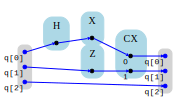

In [2]:
from pytket.utils import Graph
Graph(circ).get_DAG()

En un circuito cuántico cada línea representa un qubit, el cual se transforma al pasar por las distintas compuertas de izquierda a derecha. O, en otras palabras, el tiempo fluye de izquierda a derecha.

Como vimos antes, las compuertas que actúan sobre distintos qubits y se pueden ejecutar al mismo tiempo, se pueden *componer* tomando el producto tensorial de las mismas. En el circuito anterior, $H$ afecta a al qubit $q[0]$, mientras que $Z$ se aplica a $q[1]$ y el tercer qubit no es afectado. Entonces, el operador que actúa sobre el sistema cuántico de 3 qubits es:

\begin{align*}
H \otimes Z \otimes I
\end{align*}

Por otro lado, las compuertas que afecten a un qubit se deben aplicar en secuencia, es decir, se multiplican los operadores.

Por ejemplo, al qubit $q[0]$ en la imagen anterior, primero se le aplica un $H$, después $X$ y al final se usa de control para un $CNOT$ (recordemos que el cubit de control de un $CNOT$ no sufre cambios). Entonces al final de aplicar el circuito, el qubit $q[0]$ termina en el estado:

\begin{align*}
| q_{0_{final}} \rangle = I Z  H | q_0 \rangle
\end{align*}

<div class="alert alert-block alert-success">
    <b>💡 Recuerda 💡</b>
    <br>
    Al escribir los operadores o compuertas que afectan a un qubit, se hace en el sentido contrario a como se ven en el circuito.
</div>

# 2.2.1. ⚠️ Accediendo a la información ⚠️

Para fines de _debugging_, cuando simulamos un circuito cuántico en una computadora clásica, podemos acceder al estado del sistema.

In [3]:
circ.get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j])

In [4]:
circ.get_unitary()

array([[ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.70710678+0.j,  0.        +0.j,
         0.        +0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
         0.70710678+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j,  0.70710678+0.j],
       [ 0.        +0.j,  0.        +0.j, -0.70710678+0.j,
         0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.70710678+0.j,  0.        +0.j],
       [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
        -0.70710678+0.j,  0.        +0.j,  0.        +0.j,
         0.        +0.j, -0.70710678+0.j],
       [ 0.70710678+0.j,  0.      

## 2.3. Medición

Para obtener el resultado de un algoritmo cuántico lo que hacemos es medir u observar el estado de uno o más qubits, normalmente en la base computacional. Dicha medición nos dará un bit de información clásica ${0, 1}$, dependiendo en qué estado fue encontrado. Una medición de múltiples qubits entonces genera una cadena de números binarios.

In [5]:
circ.measure_all()
render_circuit_jupyter(circ)

## 2.4. Control clásico

En algoritmos como los necesarios para realizar correción de errores se deben aplicar compuertas cuánticas dependiendo del resultado obtenido al medir otros qubits.

In [6]:
copia_circ = circ.copy()
copia_circ.Z(2, condition_bits=[0], condition_value=1)
copia_circ.X(2, condition_bits=[1], condition_value=1)
render_circuit_jupyter(circ)

# 2.5. Simulación

`pytket` es una librería que permite crear circuitos cuánticos y compilarlos. No tiene la capacidad de ejecutar simulaciones cuánticas.

In [7]:
circ.get_statevector()

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
       0.        +0.j, 0.        +0.j, 0.70710678+0.j, 0.        +0.j])

Sin embargo, es un compilador agnóstico que permite ejecutar circuitos cuánticos en los distintos simuladores que existen actualmente. Esto se hace a través de las distintas extensiones `pytket-*`.

# 2.5.1. El simulador Aer de IBM

In [8]:
from pytket.extensions.qiskit import AerBackend

aer = AerBackend()
circ_compilado_aer = aer.get_compiled_circuit(circuit=circ)
handle_aer = aer.process_circuit(circuit=circ_compilado_aer, n_shots=10)
resultado_aer = aer.get_result(handle_aer)


Podemos por ejemplo observar cada una de las cadenas binarias obtenidas en cada simulación (_shot_).

In [9]:
resultado_aer.get_shots()

array([[1, 1, 0],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 0]], dtype=uint8)

Generalmente, estamos simplemente interesados tener un resumen de los resultados obtenidos.

In [10]:
resultado_aer.get_counts()

Counter({(0, 0, 0): 6, (1, 1, 0): 4})

# 2.5.2. El simulador Qulacs

In [11]:
from pytket.extensions.qulacs import QulacsBackend

qulacs = QulacsBackend()
circ_compilado_qulacs = qulacs.get_compiled_circuit(circuit=circ)
handle_qulacs = qulacs.process_circuit(circuit=circ_compilado_qulacs, n_shots=10)
resultado_qulacs = qulacs.get_result(handle_qulacs)
resultado_qulacs.get_counts()

Counter({(0, 0, 0): 4, (1, 1, 0): 6})

# 2.6. Un circuito más interesnate

<div class="alert alert-block alert-info">
    <b>📝 Ejercicio 2.4.e1 📝</b><br>
    Usando <code>pytket</code> crea el circuito cuántico de la siguiente imagen.
</div>


![title="Quantum_circuit.jpg"](https://www.researchgate.net/profile/Maximilian_Plenert/publication/281376174/figure/fig6/AS:669946434551845@1536739085660/Quantum-Circuit-for-Quantum-Teleportation.png)

In [13]:
# Circuito
circuito_ejercicio = Circuit(3)

# Compuertas

# Medición

# Compuertas controladas


render_circuit_jupyter(circuito_ejercicio)